
# COVID-19による人流の変化

Googleが公開しているコミュニティモビリティレポートのデータを用いてテーブルデータの基本的な統計情報を可視化してみましょう。

Google LLC "Google COVID-19 Community Mobility Reports".
https://www.google.com/covid19/mobility/ Accessed: July-19, 2020.


このデータは、さまざまな場所における訪問数と滞在時間が、基準値と比較してどのように変化しているかを示しています。
カテゴリは、次の6つに分かれています。

1. 食料品店、薬局（食料品店、食品問屋、青果市場、高級食料品店、ドラッグストア、薬局など）
2. 公園（地域の公園、国立公園、公共のビーチ、マリーナ、ドッグパーク、広場、庭園など）
3. 乗換駅（公共交通機関の拠点（例: 地下鉄、バス、電車の駅）など）
4. 小売、娯楽（レストラン、カフェ、ショッピング センター、テーマパーク、博物館、図書館、映画館など）
5. 住宅
6. 職場

基準値は、2020 年 1 月 3 日～2 月 6 日の 5 週間における該当曜日の中央値になります。

データの詳細は、https://www.google.com/covid19/mobility/data_documentation.html からご確認ください


In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import pycountry
%matplotlib inline

In [2]:
df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

/var/folders/z5/0lnyp_m54dqc1xkz22ncbj2h0000gn/T/ipykernel_89270/3738925007.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')


In [3]:
df.keys()

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

まずは、`date`列をpandasの`datetime`型に変換します。

In [4]:
df.loc[:, 'date'] = pd.to_datetime(df['date'])

In [5]:
df['date'].min(), df['date'].max()

(Timestamp('2020-02-15 00:00:00'), Timestamp('2022-10-15 00:00:00'))

## 2020年日本国内のモビリティトレンドの把握

国内のデータのみを抽出して、新たなdataframe`JP`に格納します。

In [6]:
JP = df[df['country_region_code'].isin(['JP'])]

In [7]:
# `sub_region_1`という列に都道府県名が入っています。
JP['sub_region_1'].unique()

array([nan, 'Aichi', 'Akita', 'Aomori', 'Chiba', 'Ehime', 'Fukui',
       'Fukuoka', 'Fukushima', 'Gifu', 'Gunma', 'Hiroshima', 'Hokkaido',
       'Hyogo', 'Ibaraki', 'Ishikawa', 'Iwate', 'Kagawa', 'Kagoshima',
       'Kanagawa', 'Kochi', 'Kumamoto', 'Kyoto', 'Mie', 'Miyagi',
       'Miyazaki', 'Nagano', 'Nagasaki', 'Nara', 'Niigata', 'Oita',
       'Okayama', 'Okinawa', 'Osaka', 'Saga', 'Saitama', 'Shiga',
       'Shimane', 'Shizuoka', 'Tochigi', 'Tokushima', 'Tokyo', 'Tottori',
       'Toyama', 'Wakayama', 'Yamagata', 'Yamaguchi', 'Yamanashi'],
      dtype=object)

In [8]:
# 都道府県ごとに何日分のデータが入っているか確認してみましょう。

JP.groupby(['sub_region_1'])['date'].size()

sub_region_1
Aichi        974
Akita        974
Aomori       974
Chiba        974
Ehime        974
Fukui        974
Fukuoka      974
Fukushima    974
Gifu         974
Gunma        974
Hiroshima    974
Hokkaido     974
Hyogo        974
Ibaraki      974
Ishikawa     974
Iwate        974
Kagawa       974
Kagoshima    974
Kanagawa     974
Kochi        974
Kumamoto     974
Kyoto        974
Mie          974
Miyagi       974
Miyazaki     974
Nagano       974
Nagasaki     974
Nara         974
Niigata      974
Oita         974
Okayama      974
Okinawa      974
Osaka        974
Saga         974
Saitama      974
Shiga        974
Shimane      974
Shizuoka     974
Tochigi      974
Tokushima    974
Tokyo        974
Tottori      974
Toyama       974
Wakayama     974
Yamagata     974
Yamaguchi    974
Yamanashi    974
Name: date, dtype: int64

In [9]:
# その他の基本統計量を確認します。
JP.describe()

census_fips_code  retail_and_recreation_percent_change_from_baseline  \
count               0.0                                       46752.000000    
mean                NaN                                          -7.530437    
std                 NaN                                          11.098131    
min                 NaN                                         -89.000000    
25%                 NaN                                         -13.000000    
50%                 NaN                                          -7.000000    
75%                 NaN                                          -2.000000    
max                 NaN                                          66.000000    

       grocery_and_pharmacy_percent_change_from_baseline  \
count                                       46752.000000   
mean                                            3.120679   
std                                             7.146974   
min                                           -82.000000   
25%                                            -1.000000   
50%                                             3.000000   
75%                                             7.000000   
max                                            60.000000   

       parks_percent_change_from_baseline  \
count                        46383.000000   
mean                             0.873251   
std                             28.214259   
min                            -84.000000   
25%                            -16.000000   
50%                             -2.000000   
75%                             14.000000   
max                            303.000000   

       transit_stations_percent_change_from_baseline  \
count                                   46737.000000   
mean                                      -18.002182   
std                                        15.936060   
min                                       -92.000000   
25%                                       -27.000000   
50%                                       -18.000000   
75%                                       -10.000000   
max                                       128.000000   

       workplaces_percent_change_from_baseline  \
count                             46752.000000   
mean                                -10.894379   
std                                  13.672080   
min                                 -88.000000   
25%                                 -11.000000   
50%                                  -7.000000   
75%                                  -4.000000   
max                                  17.000000   

       residential_percent_change_from_baseline  
count                              46752.000000  
mean                                   5.626519  
std                                    4.282314  
min                                   -4.000000  
25%                                    3.000000  
50%                                    4.000000  
75%                                    7.000000  
max                                   37.000000

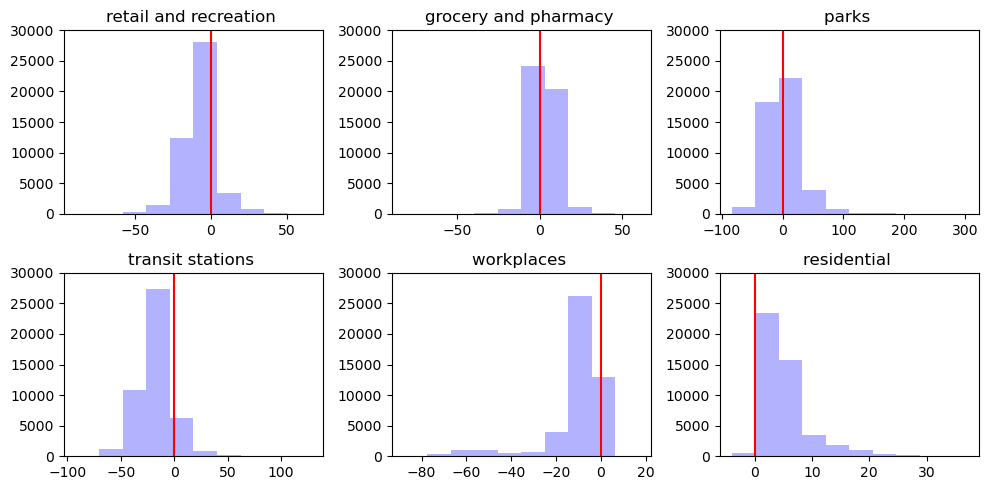

In [10]:
# ヒストグラムで図示するデータの列名をリストに格納します。
target_columns = ['retail_and_recreation_percent_change_from_baseline',
                  'grocery_and_pharmacy_percent_change_from_baseline',
                  'parks_percent_change_from_baseline',
                  'transit_stations_percent_change_from_baseline',
                  'workplaces_percent_change_from_baseline',
                  'residential_percent_change_from_baseline']
fig, axs = plt.subplots(2,3,figsize=(10,5))
axs = axs.flatten()
for i, column in enumerate(target_columns):
    df_fig = JP[column]
    ax = axs[i]
    ax.hist(df_fig, color = 'blue', alpha = .3)
    # 0（基準値）を明示するために、垂直方向の直線を`vlines`を使って引きます
    ax.vlines(0, ymin = 0, ymax = 30000, color = 'red')
    title = ' '.join(column.split('_'))
    title = title.replace('percent change from baseline', '')
    ax.set_title(title, loc='center', wrap=True)
    ax.set_ylim(0, 30000)
plt.tight_layout()
plt.show()

### 全国のモビリティの経時変化をプロットしてみましょう

In [11]:
def plot_all_japan_mobility(column, df=JP):
    plt.figure(figsize=(30,7))
    # plot only data from 2020-2-15 to 2021
    df = df[df['date']<pd.Timestamp(2021, 1, 1)]
    data = [df.loc[df['date'].isin([x]), column] for x in df['date'].unique()]
    # plt.hlines(0, xmin=-1, xmax=df['date'].nunique(), color = 'red')
    plt.axhline(0, color = 'red', linestyle='-')
    plt.boxplot(data, 
                labels = list(df['date'].unique()),
                showmeans=True)
    title = ' '.join(column.split('_'))
    plt.title('BoxPlot of {}'.format(title), size=18)
    plt.ylabel('pct change',size=15)
    plt.xlabel('date',size=15)
    plt.yticks(size=10)
    locs, labels = plt.xticks()
    # only show weekly xtick labels
    xtick_labels = [x if i % 7 ==0 else '' for i, x in enumerate(labels)]
    plt.xticks(ticks=locs, labels=xtick_labels, size=12, rotation= 60, ha='right')
    plt.grid() 
    plt.savefig('fig_{}.jpg'.format(column))
    plt.show()

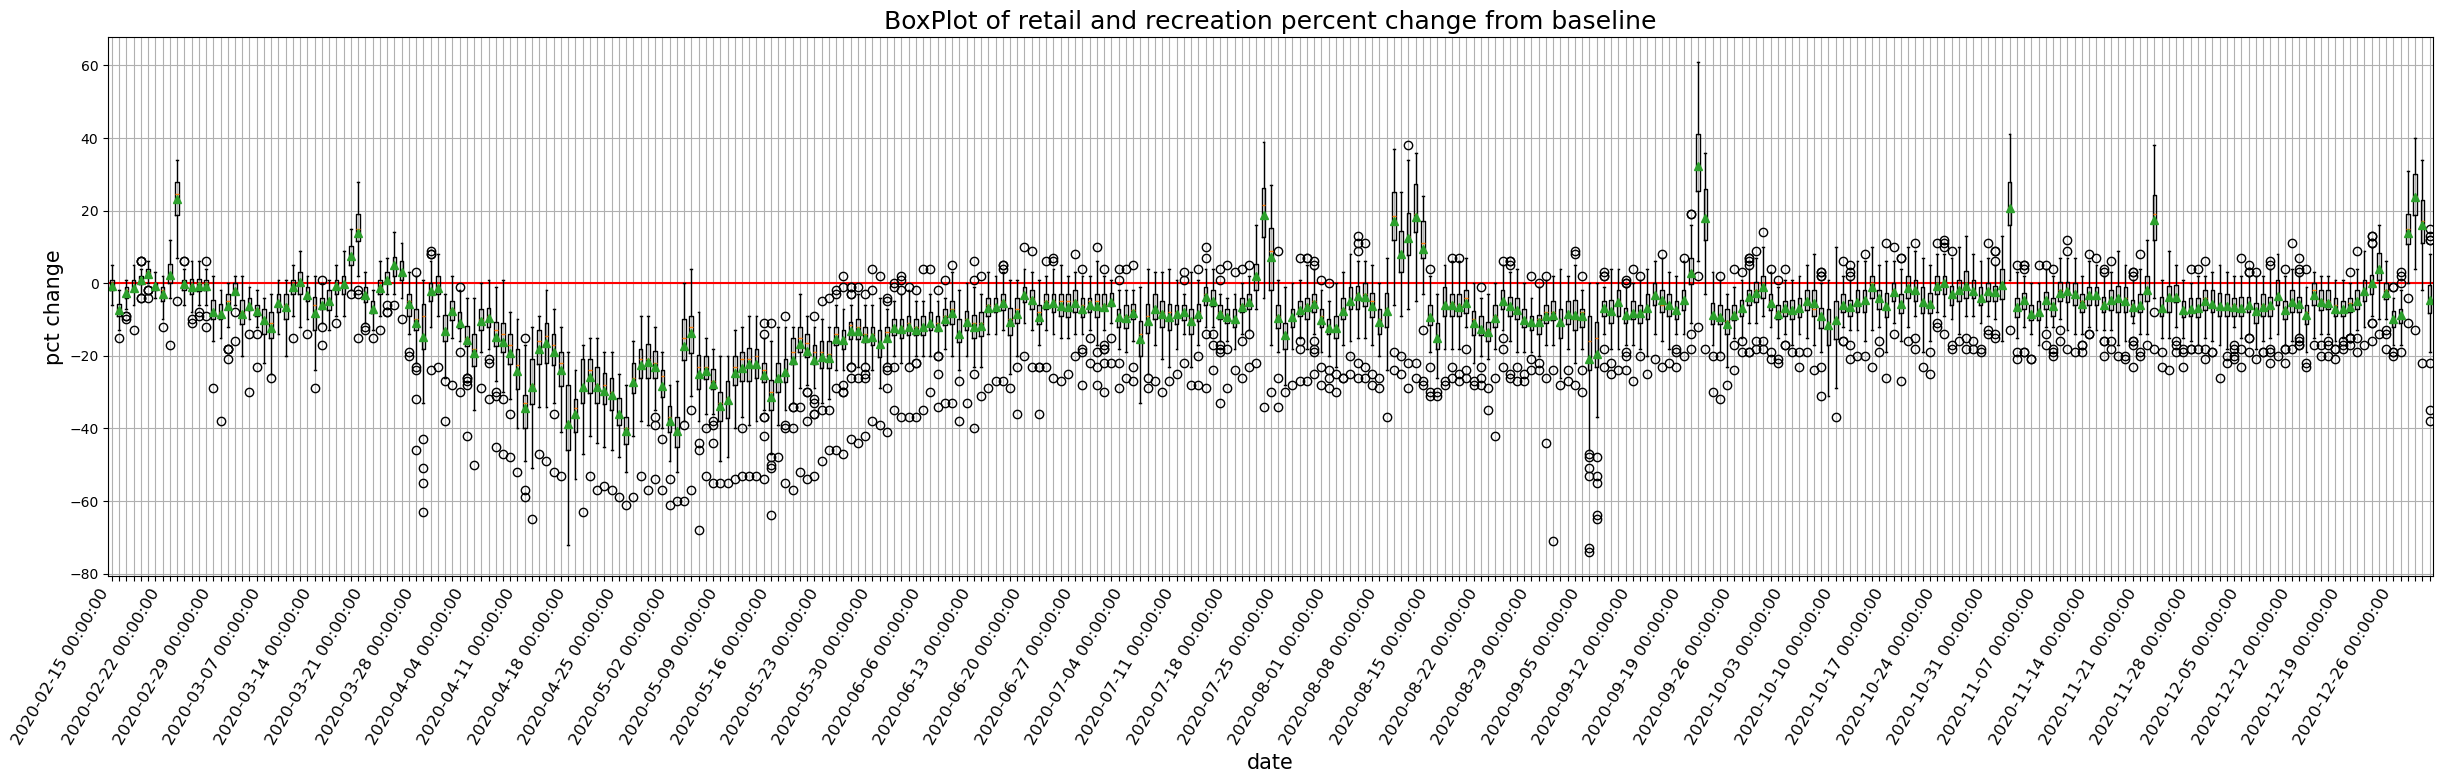

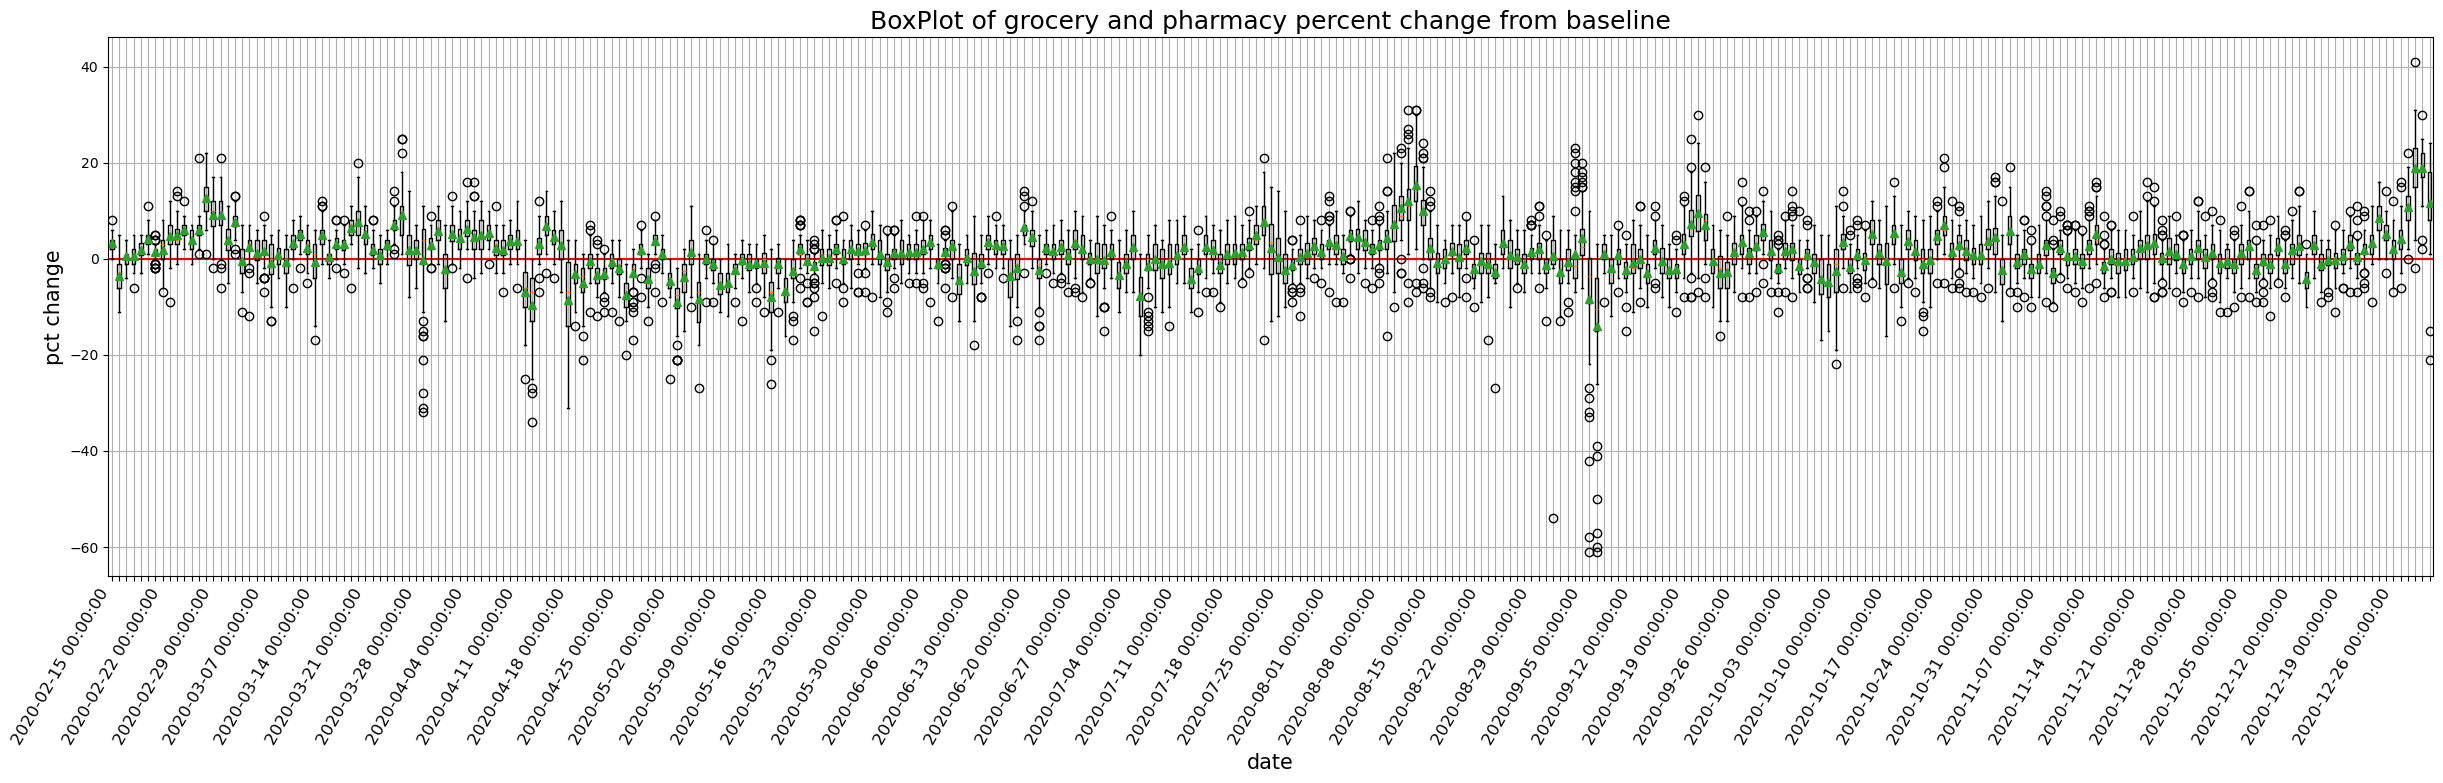

In [12]:
for column in target_columns:
    plot_all_japan_mobility(column)

## 地図上に落とし込んでみましょう

### 都道府県レベルでの1ヶ月の平均値モビリティトレンドをプロット
日本国内の都道府県レベルでのモビリティトレンドを地図上に表示します。
ここでは、2020年月6月のデータを用いて地図を作成します。
まずは、2020年6月の日本のデータを抽出します。

In [13]:
JPjune = JP[(JP['date']>=pd.Timestamp(2020,6,1))&(JP['date']<=pd.Timestamp(2020,6,30))]

In [14]:
# 都道府県ごとの１ヶ月のモビリティトレンドの平均値を抽出します。
JPjune_mobility_mean = JPjune.groupby('sub_region_1')[target_columns].mean()
JPjune_mobility_mean.sample(5)

retail_and_recreation_percent_change_from_baseline  \
sub_region_1                                                       
Niigata                                               -2.833333    
Hiroshima                                             -9.633333    
Kagawa                                                -8.900000    
Tottori                                               -4.833333    
Yamanashi                                            -11.766667    

              grocery_and_pharmacy_percent_change_from_baseline  \
sub_region_1                                                      
Niigata                                                4.033333   
Hiroshima                                              0.600000   
Kagawa                                                 0.166667   
Tottori                                                5.433333   
Yamanashi                                             -1.700000   

              parks_percent_change_from_baseline  \
sub_region_1                                       
Niigata                                22.633333   
Hiroshima                              -5.300000   
Kagawa                                -10.133333   
Tottori                                10.933333   
Yamanashi                             -11.200000   

              transit_stations_percent_change_from_baseline  \
sub_region_1                                                  
Niigata                                          -21.433333   
Hiroshima                                        -26.133333   
Kagawa                                           -24.900000   
Tottori                                          -18.633333   
Yamanashi                                        -25.866667   

              workplaces_percent_change_from_baseline  \
sub_region_1                                            
Niigata                                     -7.733333   
Hiroshima                                   -9.433333   
Kagawa                                      -6.900000   
Tottori                                     -7.033333   
Yamanashi                                   -8.833333   

              residential_percent_change_from_baseline  
sub_region_1                                            
Niigata                                       3.866667  
Hiroshima                                     5.433333  
Kagawa                                        4.766667  
Tottori                                       3.900000  
Yamanashi                                     5.900000

### 境界データのダウンロードと作成
続いて、地図として表示するための準備として、都道府県の境界データをダウンロードします。

**国土数値情報行政区域データ（全国, 世界測地系）を任意の場所へダウンロードして、解凍してください。**

In [15]:
# 次の1行のパスは、国土数値情報行政区域データをダウンロードした任意の場所に書き換えてください
path_to_boundary_data = '../../assets/data/N03-20230101_GML/N03-23_230101.shp'
# path_to_boundary_data = '~/Downloads/N03-20230101_GML/N03-23_230101.shp'
jpn_shp = gpd.read_file(path_to_boundary_data)
# 行政区域データは都道府県レベルの境界以外も含まれているため、今回は都道府県レベルの境界データのみを抽出します
prf_shp = jpn_shp[(jpn_shp['N03_001'].notnull())&
                  (jpn_shp['N03_002'].isnull())&
                  (jpn_shp['N03_003'].isnull())&
                  (jpn_shp['N03_004'].isnull())&
                  (jpn_shp['N03_007'].isnull())]

prf_shp.head(2)

Empty GeoDataFrame
Columns: [OBJECTID, N03_001, N03_002, N03_003, N03_004, N03_007, Shape_Leng, Shape_Area, geometry]
Index: []

In [16]:
# `prf_shp`の`N03_001`にある都道府県名を英語名に変換し`pref_en`というあたらしい列に入れます
prf_ja2en ={
    '北海道': 'Hokkaido', '青森県': 'Aomori', '岩手県': 'Iwate', '宮城県': 'Miyagi',
    '秋田県': 'Akita', '山形県': 'Yamagata', '福島県': 'Fukushima', '茨城県': 'Ibaraki',
    '栃木県': 'Tochigi', '群馬県': 'Gunma', '埼玉県': 'Saitama', '千葉県': 'Chiba','東京都': 'Tokyo',
    '神奈川県': 'Kanagawa', '新潟県': 'Niigata', '富山県': 'Toyama', '石川県': 'Ishikawa',
    '福井県': 'Fukui', '山梨県': 'Yamanashi', '長野県': 'Nagano', '岐阜県': 'Gifu', '静岡県': 'Shizuoka',
    '愛知県': 'Aichi', '三重県': 'Mie', '滋賀県': 'Shiga', '京都府': 'Kyoto', '大阪府': 'Osaka',
    '兵庫県': 'Hyogo', '奈良県': 'Nara', '和歌山県': 'Wakayama', '鳥取県': 'Tottori',
    '島根県': 'Shimane', '岡山県': 'Okayama', '広島県': 'Hiroshima', '山口県': 'Yamaguchi',
    '徳島県': 'Tokushima', '香川県': 'Kagawa', '愛媛県': 'Ehime', '高知県': 'Kochi',
    '福岡県': 'Fukuoka', '佐賀県': 'Saga', '長崎県': 'Nagasaki', '熊本県': 'Kumamoto',
    '大分県': 'Oita', '宮崎県': 'Miyazaki', '鹿児島県': 'Kagoshima', '沖縄県': 'Okinawa'}
prf_shp['pref_en'] = prf_shp['N03_001'].map(prf_ja2en)
prf_shp.head(2)

Empty GeoDataFrame
Columns: [OBJECTID, N03_001, N03_002, N03_003, N03_004, N03_007, Shape_Leng, Shape_Area, geometry, pref_en]
Index: []

In [17]:
# 都道府県別の2020年6月のモビリティトレンドの平均値を格納した`JPjune_mobility_mean`に境界データをマージします
JPjune_mobility_mean_geo = JPjune_mobility_mean.merge(
                            prf_shp, left_index = True, right_on = 'pref_en', how = 'left')

## 東京都の日次モビリティトレンドのプロット

In [18]:
# 東京都の2020年のデータのみを抽出してDataFrameに格納
tokyo = JP[(JP['sub_region_1'].isin(['Tokyo']))&
          (JP['date']<pd.Timestamp(2021,1,1))]

In [19]:
tokyo.reset_index(drop=True, inplace=True)

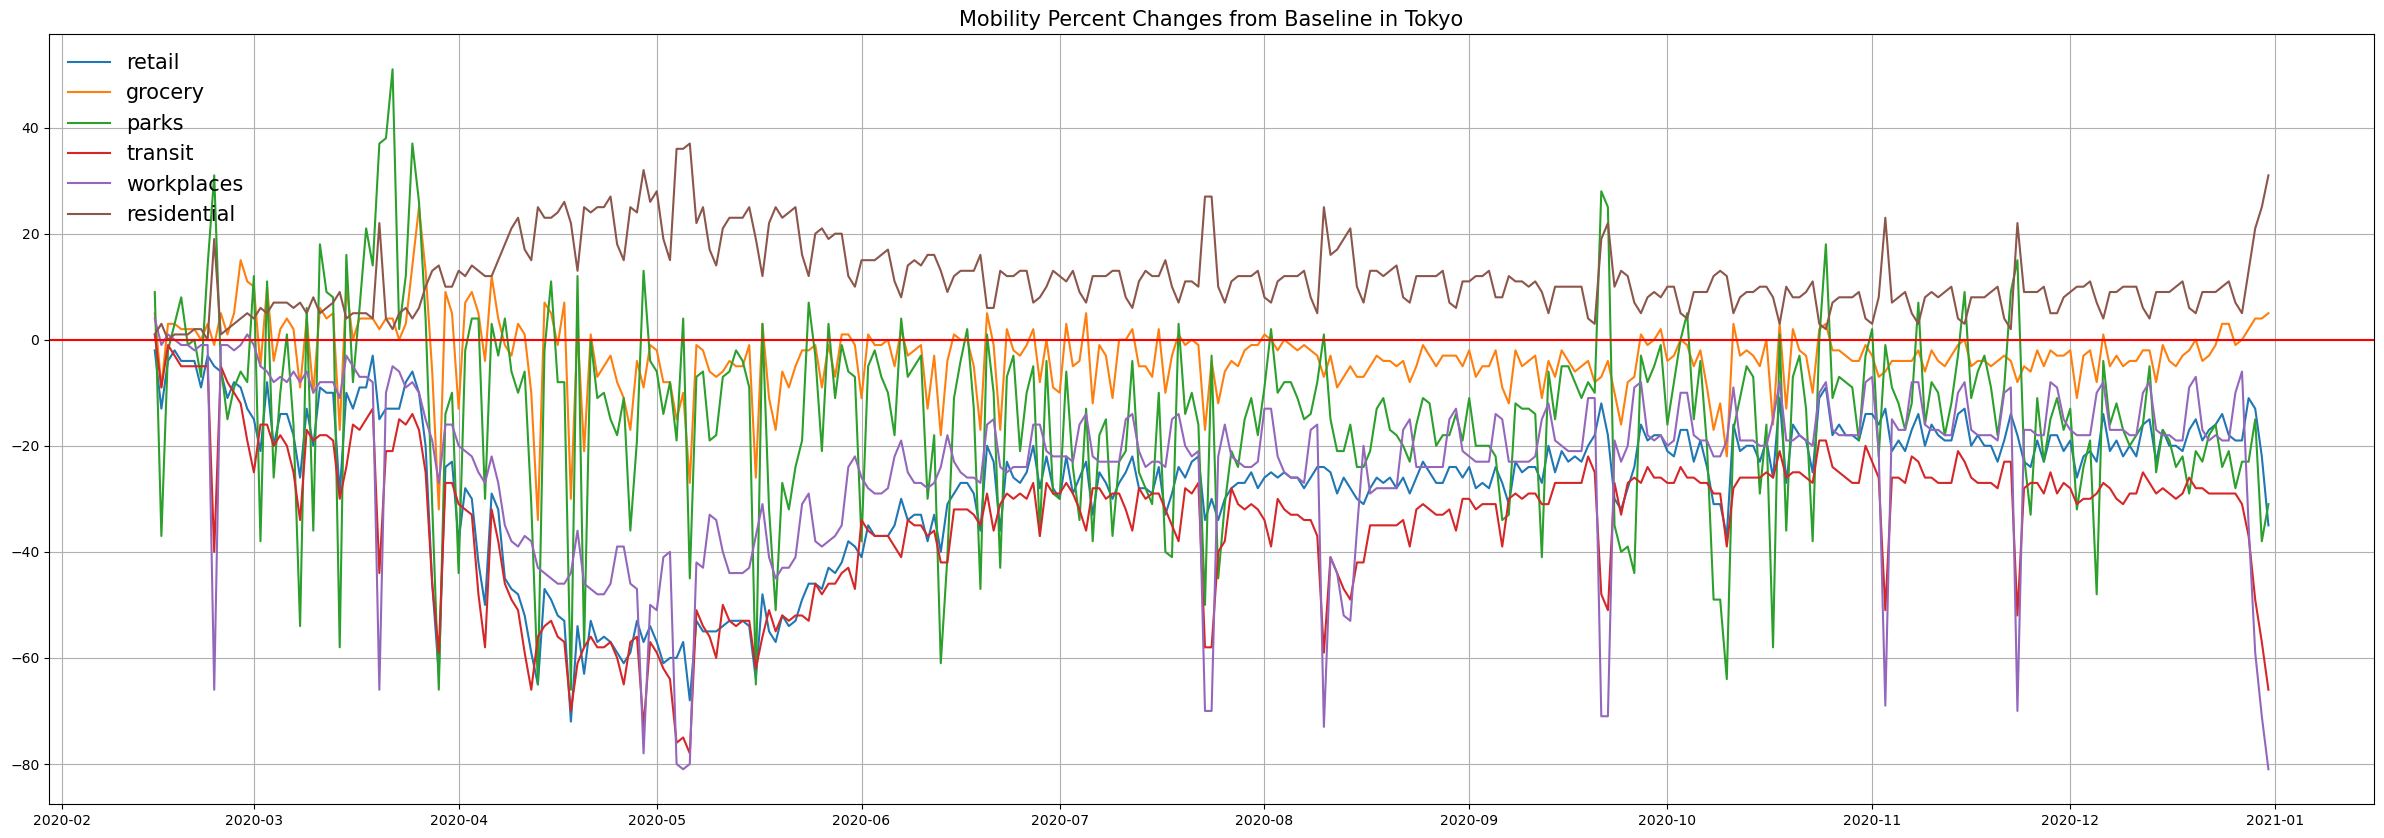

In [20]:
plt.figure(figsize=(30,10))
for column in target_columns:
    plt.plot(tokyo['date'],tokyo[column], label = column.split('_')[0])
plt.axhline(0, color = 'red', linestyle='-')
plt.legend(fontsize=15, frameon=False)
plt.title('Mobility Percent Changes from Baseline in Tokyo', fontsize=15)
plt.grid()
plt.show()

## 2020年6月の世界のMobilityの変化率

In [21]:
print("Number of countries in df: {}".format(len(df['country_region'].unique())))

Number of countries in df: 135


In [22]:
# 6月のデータのみを抽出して新しいDataFrameに格納
df.loc[:, 'month'] = pd.DatetimeIndex(df['date']).month
June = df[df['month'].isin([6])]

In [23]:
# geopandasから世界地図のGeoDataFrameをダウンロード
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
world.head(2)

/var/folders/z5/0lnyp_m54dqc1xkz22ncbj2h0000gn/T/ipykernel_89270/1728541891.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path('naturalearth_lowres')


pop_est continent      name iso_a3  gdp_md_est  \
0    889953.0   Oceania      Fiji    FJI        5496   
1  58005463.0    Africa  Tanzania    TZA       63177   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...

`world`の`geometry`列にポリゴンが入っています。
国名`name`で6月のDataFrame`June`とマージしたいが、表記ゆれが多いため簡単にマージできません。
そこで、DataFrame`June`の国名`country_region`を`world`で用いられている`iso_a3`コードに変換して、コードを基準にマージします。
DataFrame`June`の国名をisoのコードに変換するために、今回は`pycountry`というパッケージを用います。

In [24]:

def name2code(name):
    try: 
        country_object = pycountry.countries.search_fuzzy(name)[0]
        code = country_object.alpha_3
        return code
    except:
        return ''

In [25]:
country_code_dict = {}
for country in June['country_region'].unique():
    country_code_dict[country] = name2code(country)

SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='US-GA', country_code='US', name='Georgia', parent_code=None, type='State')
SubdivisionHierarchy(code='GT-GU', country_code='GT', name='Guatemala', parent_code=None, type='Department')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='GN-ML', country_code='GN', name='Mali', parent='L', parent_code='GN-L', type='Prefecture')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='NG-NI', country_code='NG', name='Niger', parent_code=None, type='State')
SubdivisionHierarchy(code='PA-

In [26]:
# パッケージ`pycountry`で変換できなかった国名を確認します。
[k for k, v in country_code_dict.items() if v == '']

['Cape Verde', 'Myanmar (Burma)', 'Turkey']

In [27]:
# これらの国については、手動でコードを入力します。
country_code_dict['South Korea'] = 'KOR'
country_code_dict['Cape Verde'] = 'CPV'
country_code_dict['Laos'] = 'LAO'
country_code_dict['Myanmar (Burma)'] = 'MMR'

`map`を用いて、データフレーム`June`の`country_region`に上で作成した国名とコードが対応する辞書`country_code_dict`を適用させて、isoコードを格納する列`iso_a3`を作成します。

In [28]:
June = June.groupby('country_region').median(numeric_only=True).reset_index()
June.loc[:,'iso_a3'] = June.loc[:, 'country_region'].map(country_code_dict)

In [29]:
# 2020年6月のMobilityデータと各国の境界のデータをマージします。
June_geo = June.merge(world, left_on = 'iso_a3', right_on='iso_a3', how='outer')

In [30]:
# 可視化のためGeoDataFrameに変換します。
gdf = gpd.GeoDataFrame(June_geo, geometry=June_geo['geometry'])

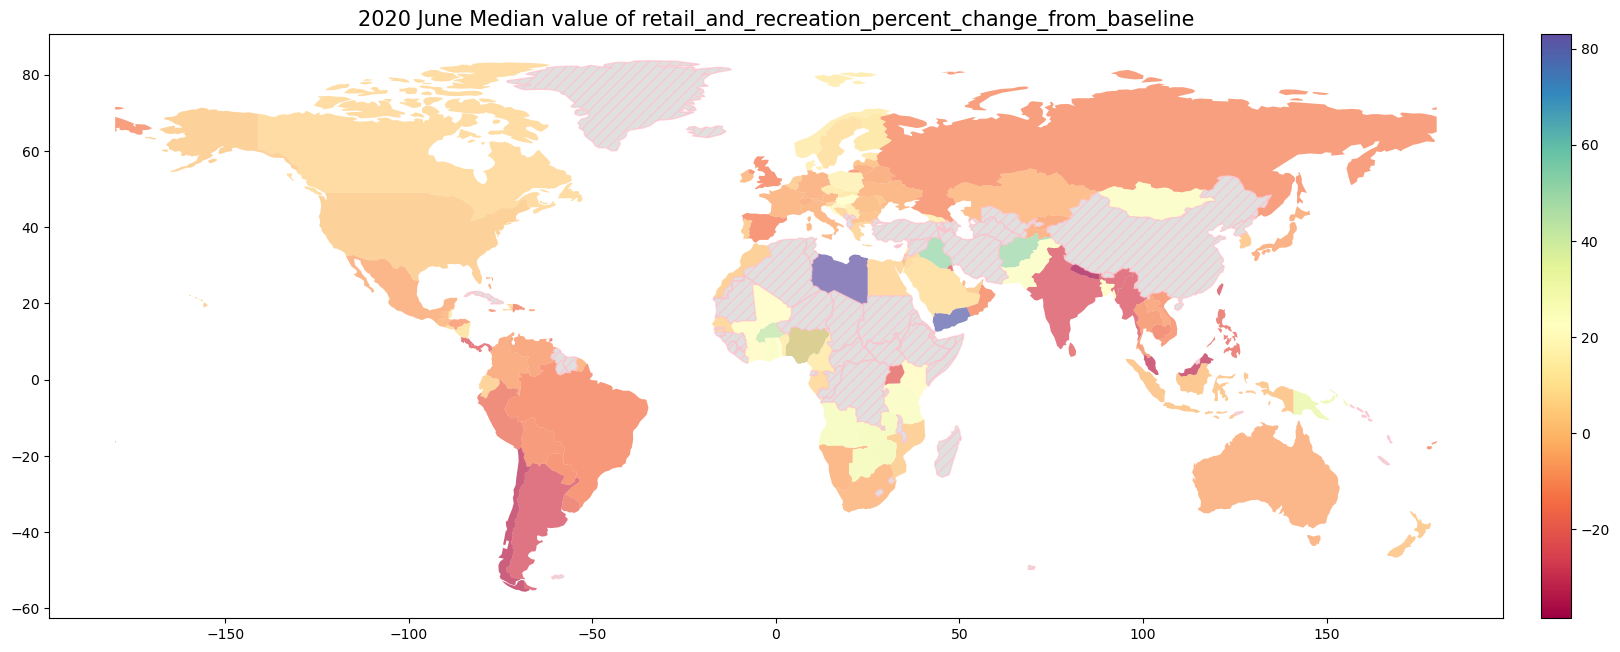

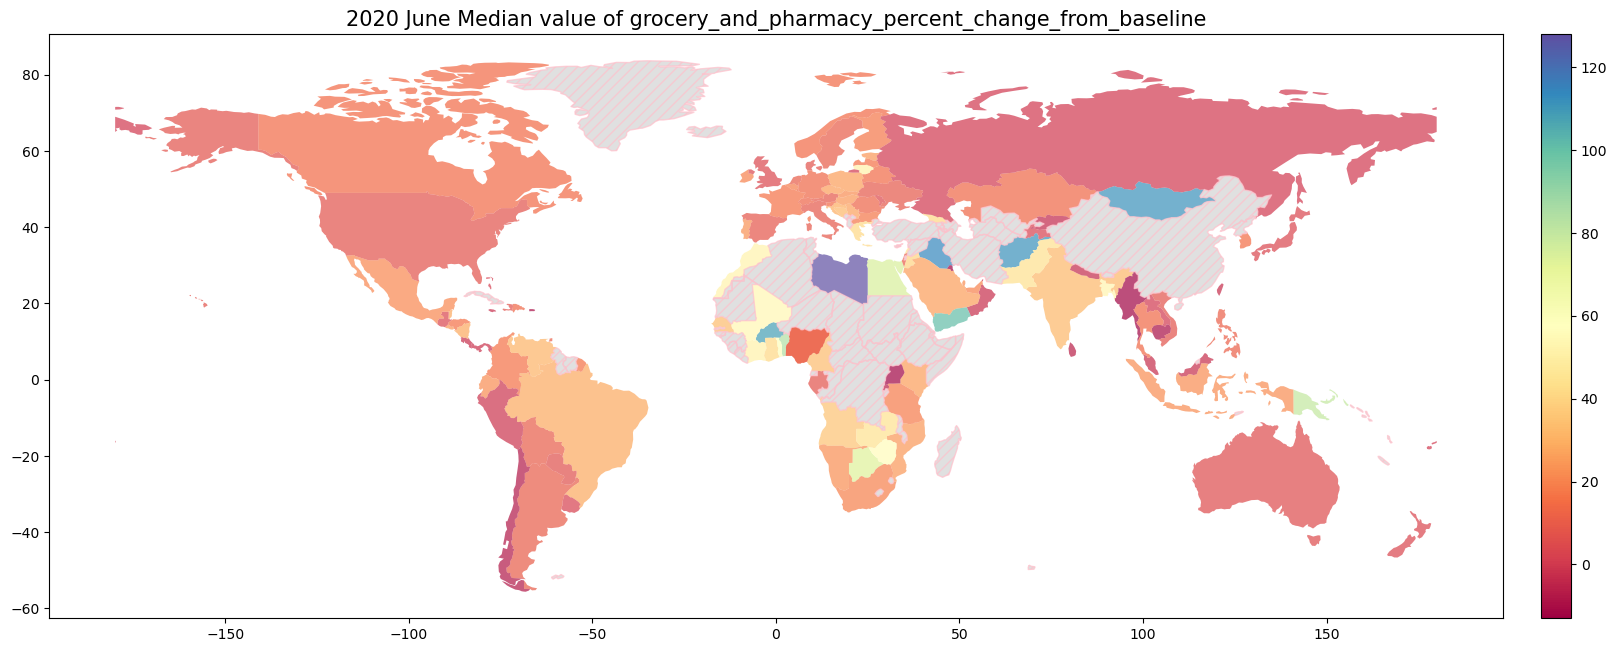

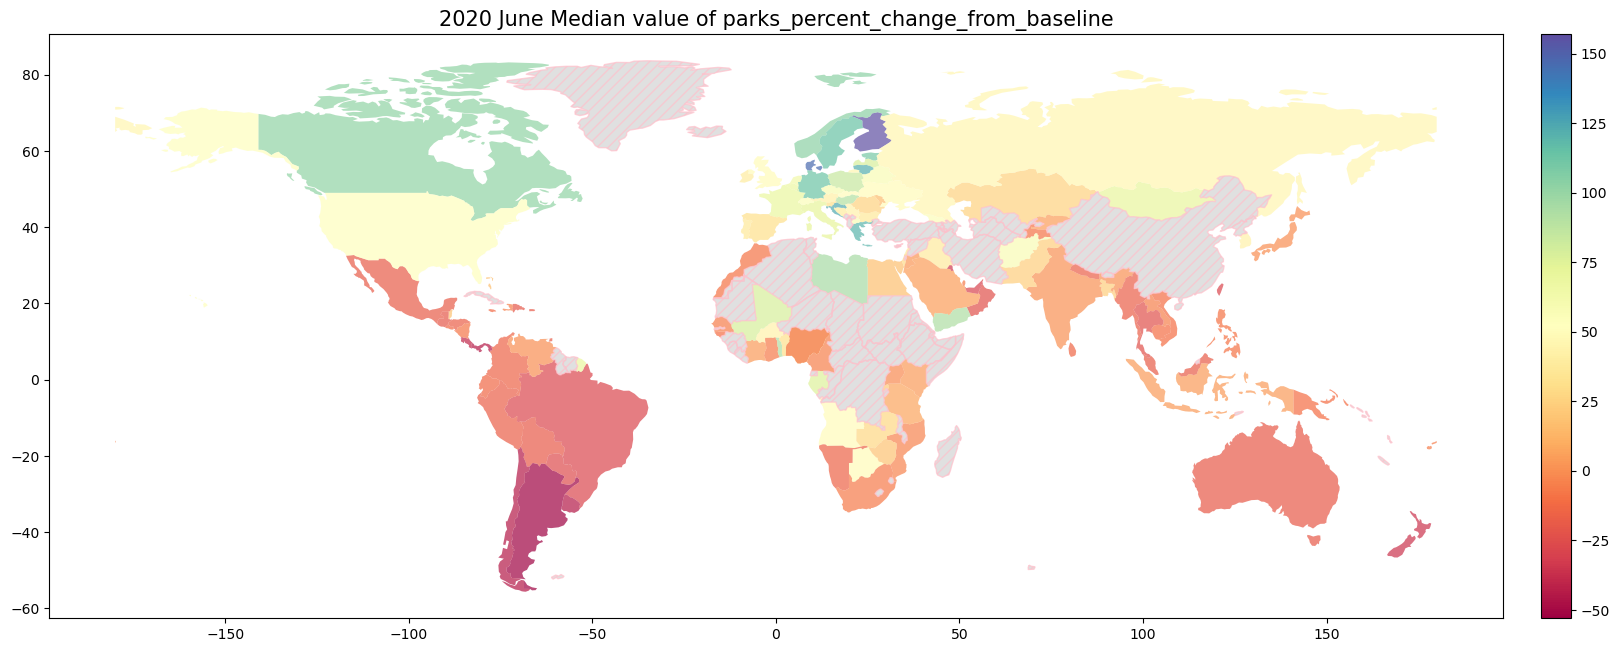

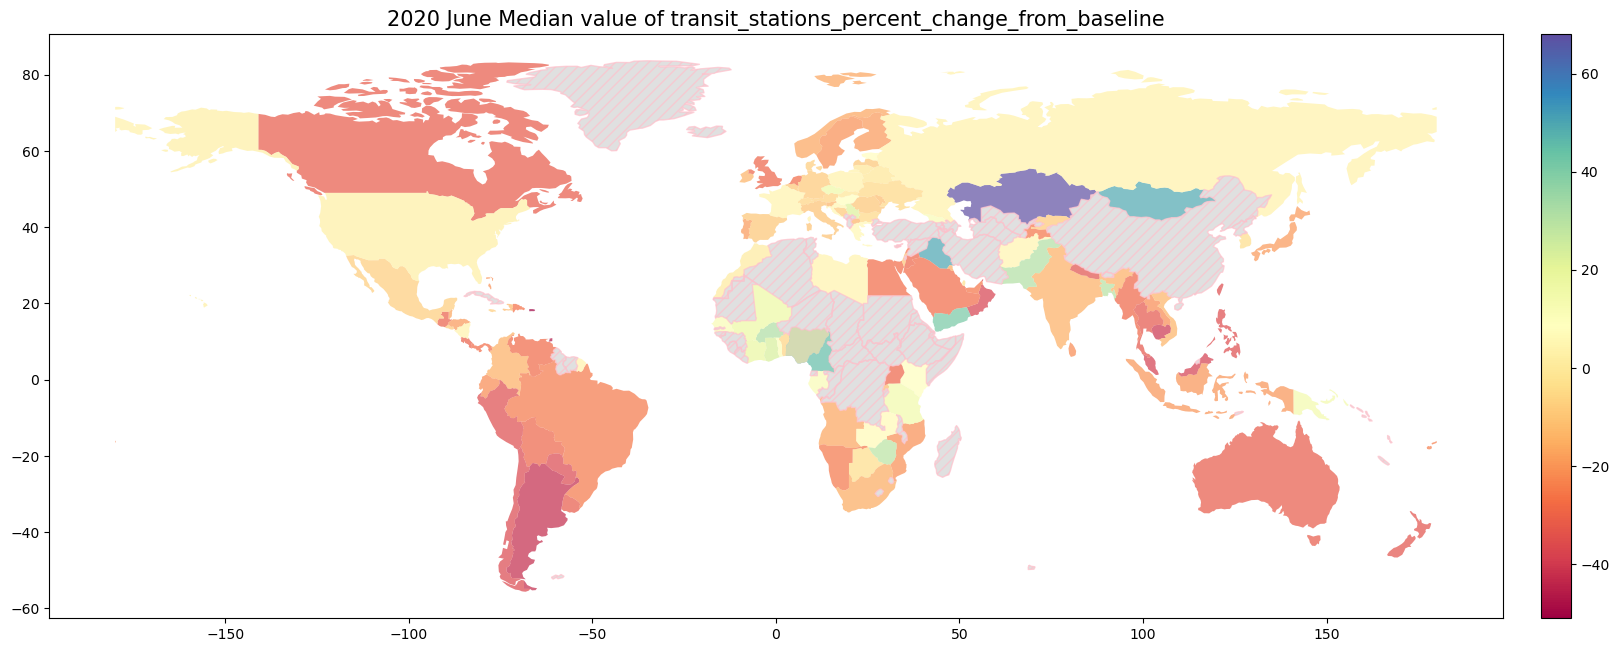

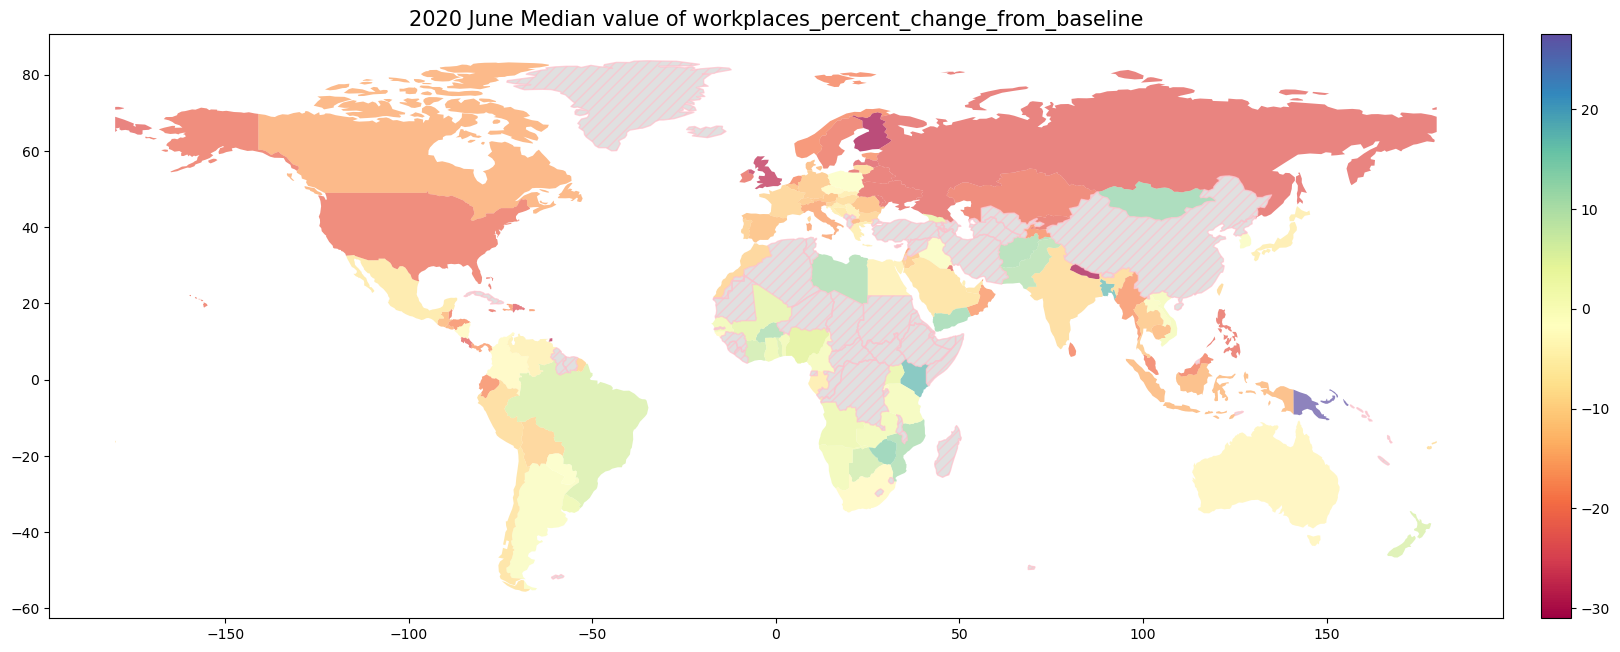

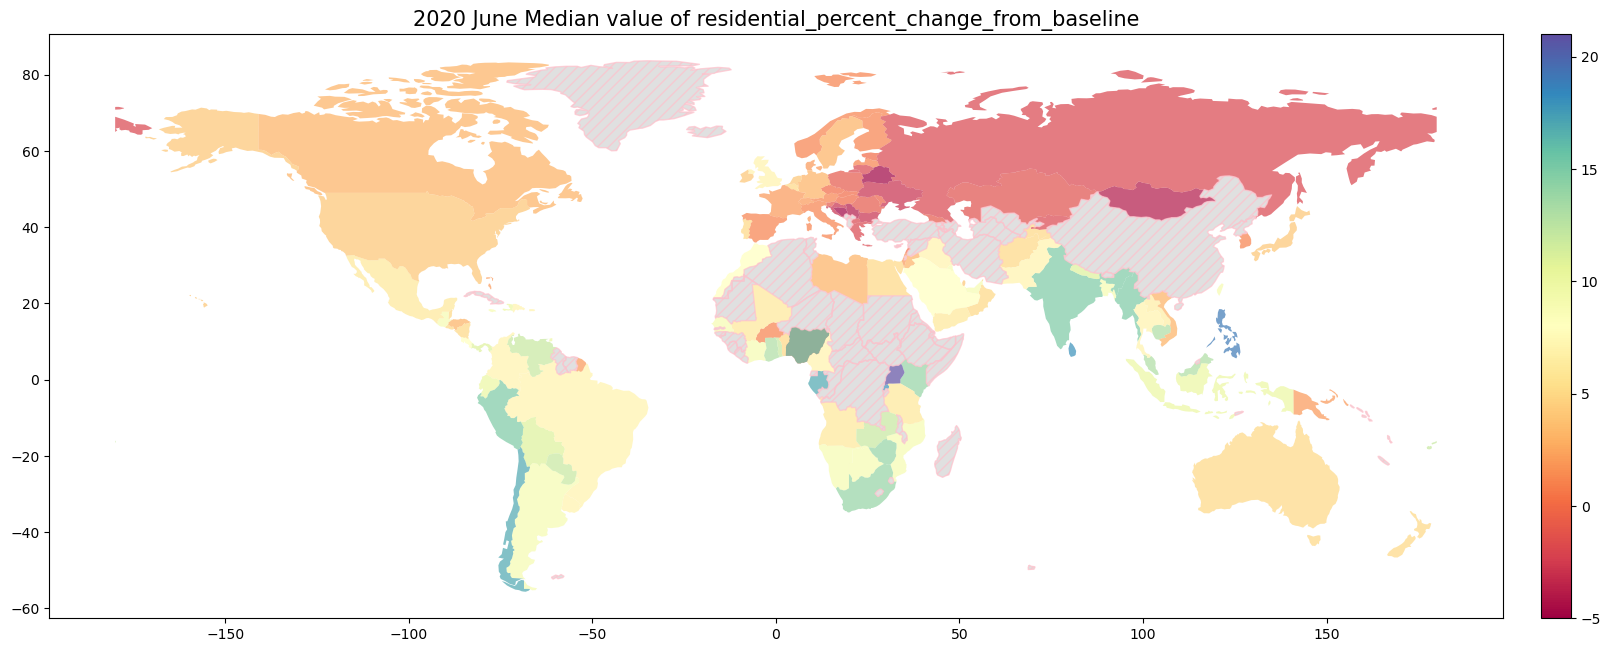

In [31]:
gdf = gdf[(gdf['pop_est']>0) & (gdf.name!="Antarctica")]

for column in ['retail_and_recreation_percent_change_from_baseline',
               'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
               'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
               'residential_percent_change_from_baseline']:
    fig, ax = plt.subplots(1, 1, figsize=(20,18))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.1)
    gdf.plot(column=column, ax = ax, 
             legend = True, cmap='Spectral', 
             alpha=.7, cax = cax, 
             missing_kwds={
                 "color": "lightgrey", 
                 "edgecolor": "pink",
                 "hatch": "///",
                 "label": "Missing values"})
    ax.set_title("2020 June Median value of {}".format(column), fontsize= 15)
    plt.show()